# Logistic Regression

## 1. About the dataset
The dataset is about the prediction of the diabetes. The dataset contains 768 rows and 9 columns. The columns are as follows:
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

## 2. Things we can do with this dataset
1. We can predict whether a person has diabetes or not.
2. We can predict the probability of a person having diabetes.
3. We can predict the probability of a person not having diabetes.
4. We can predict the probability of a person having diabetes given that the person has a certain age.
5. We can predict the probability of a person having diabetes given that the person has a certain BMI.
6. We can predict the probability of a person having diabetes given that the person has a certain glucose level.
7. We can predict the probability of a person having diabetes given that the person has a certain blood pressure.
8. We can predict the probability of a person having diabetes given that the person has a certain skin thickness.
9. We can predict the probability of a person having diabetes given that the person has a certain insulin level.
10. We can predict the probability of a person having diabetes given that the person has a certain pedigree function.
11. We can predict the probability of a person having diabetes given that the person has a certain number of pregnancies.
12. We can predict the probability of a person having diabetes given that the person has a certain age and a certain BMI.
13. We can predict the probability of a person having diabetes given that the person has a certain age and a certain glucose level.
14. And so on...

## 3. Things we are going to do with this dataset
We are going to predict whether a person has diabetes or not.

## 4. Importing the libraries

In [207]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

## 5. Importing the dataset

In [208]:
df = pd.read_csv('diabetes.csv')    # reading the dataset

## 6. Exploring Dataset

In [209]:
df.head()   # first 5 rows of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [210]:
df.info()   # information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [211]:
df.describe()   # statistical information about the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [212]:
df.isnull().sum()   # checking for null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [213]:
df['Outcome'].value_counts()    # checking the number of people having diabetes and not having diabetes

0    500
1    268
Name: Outcome, dtype: int64

## 7. Data Visualization

### 7.1. Visualizing the number of people having diabetes and not having diabetes
From the below graph we can conclude that the number of people having diabetes is less than the number of people not having diabetes.

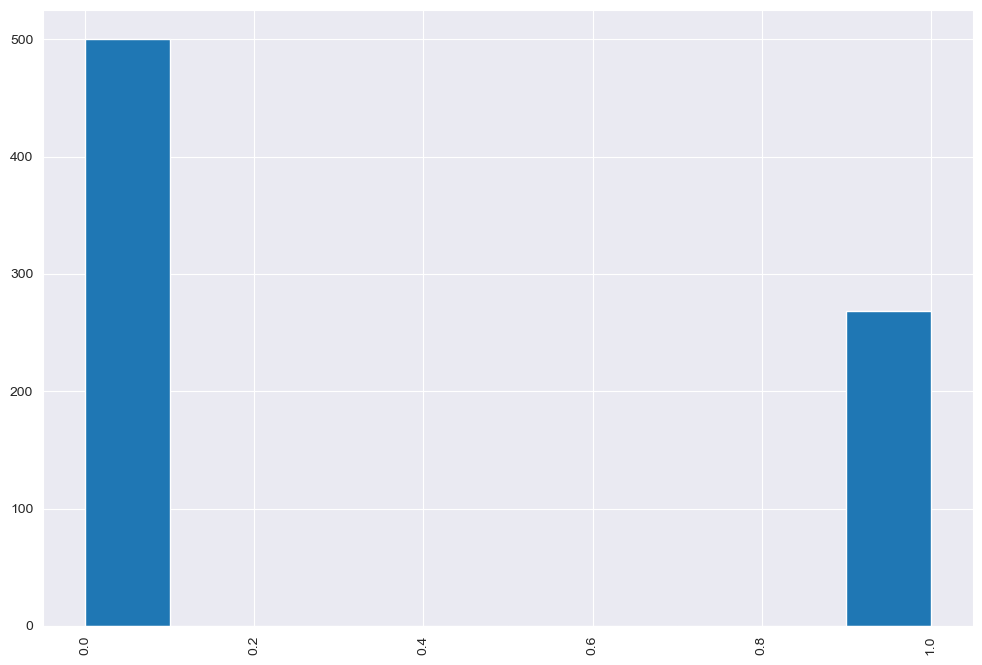

In [214]:
plt.figure(figsize = (12, 8))
plt.hist(df['Outcome'])
plt.xticks(rotation = 90)
plt.show()

### 7.2. Visualizing with the pairplot

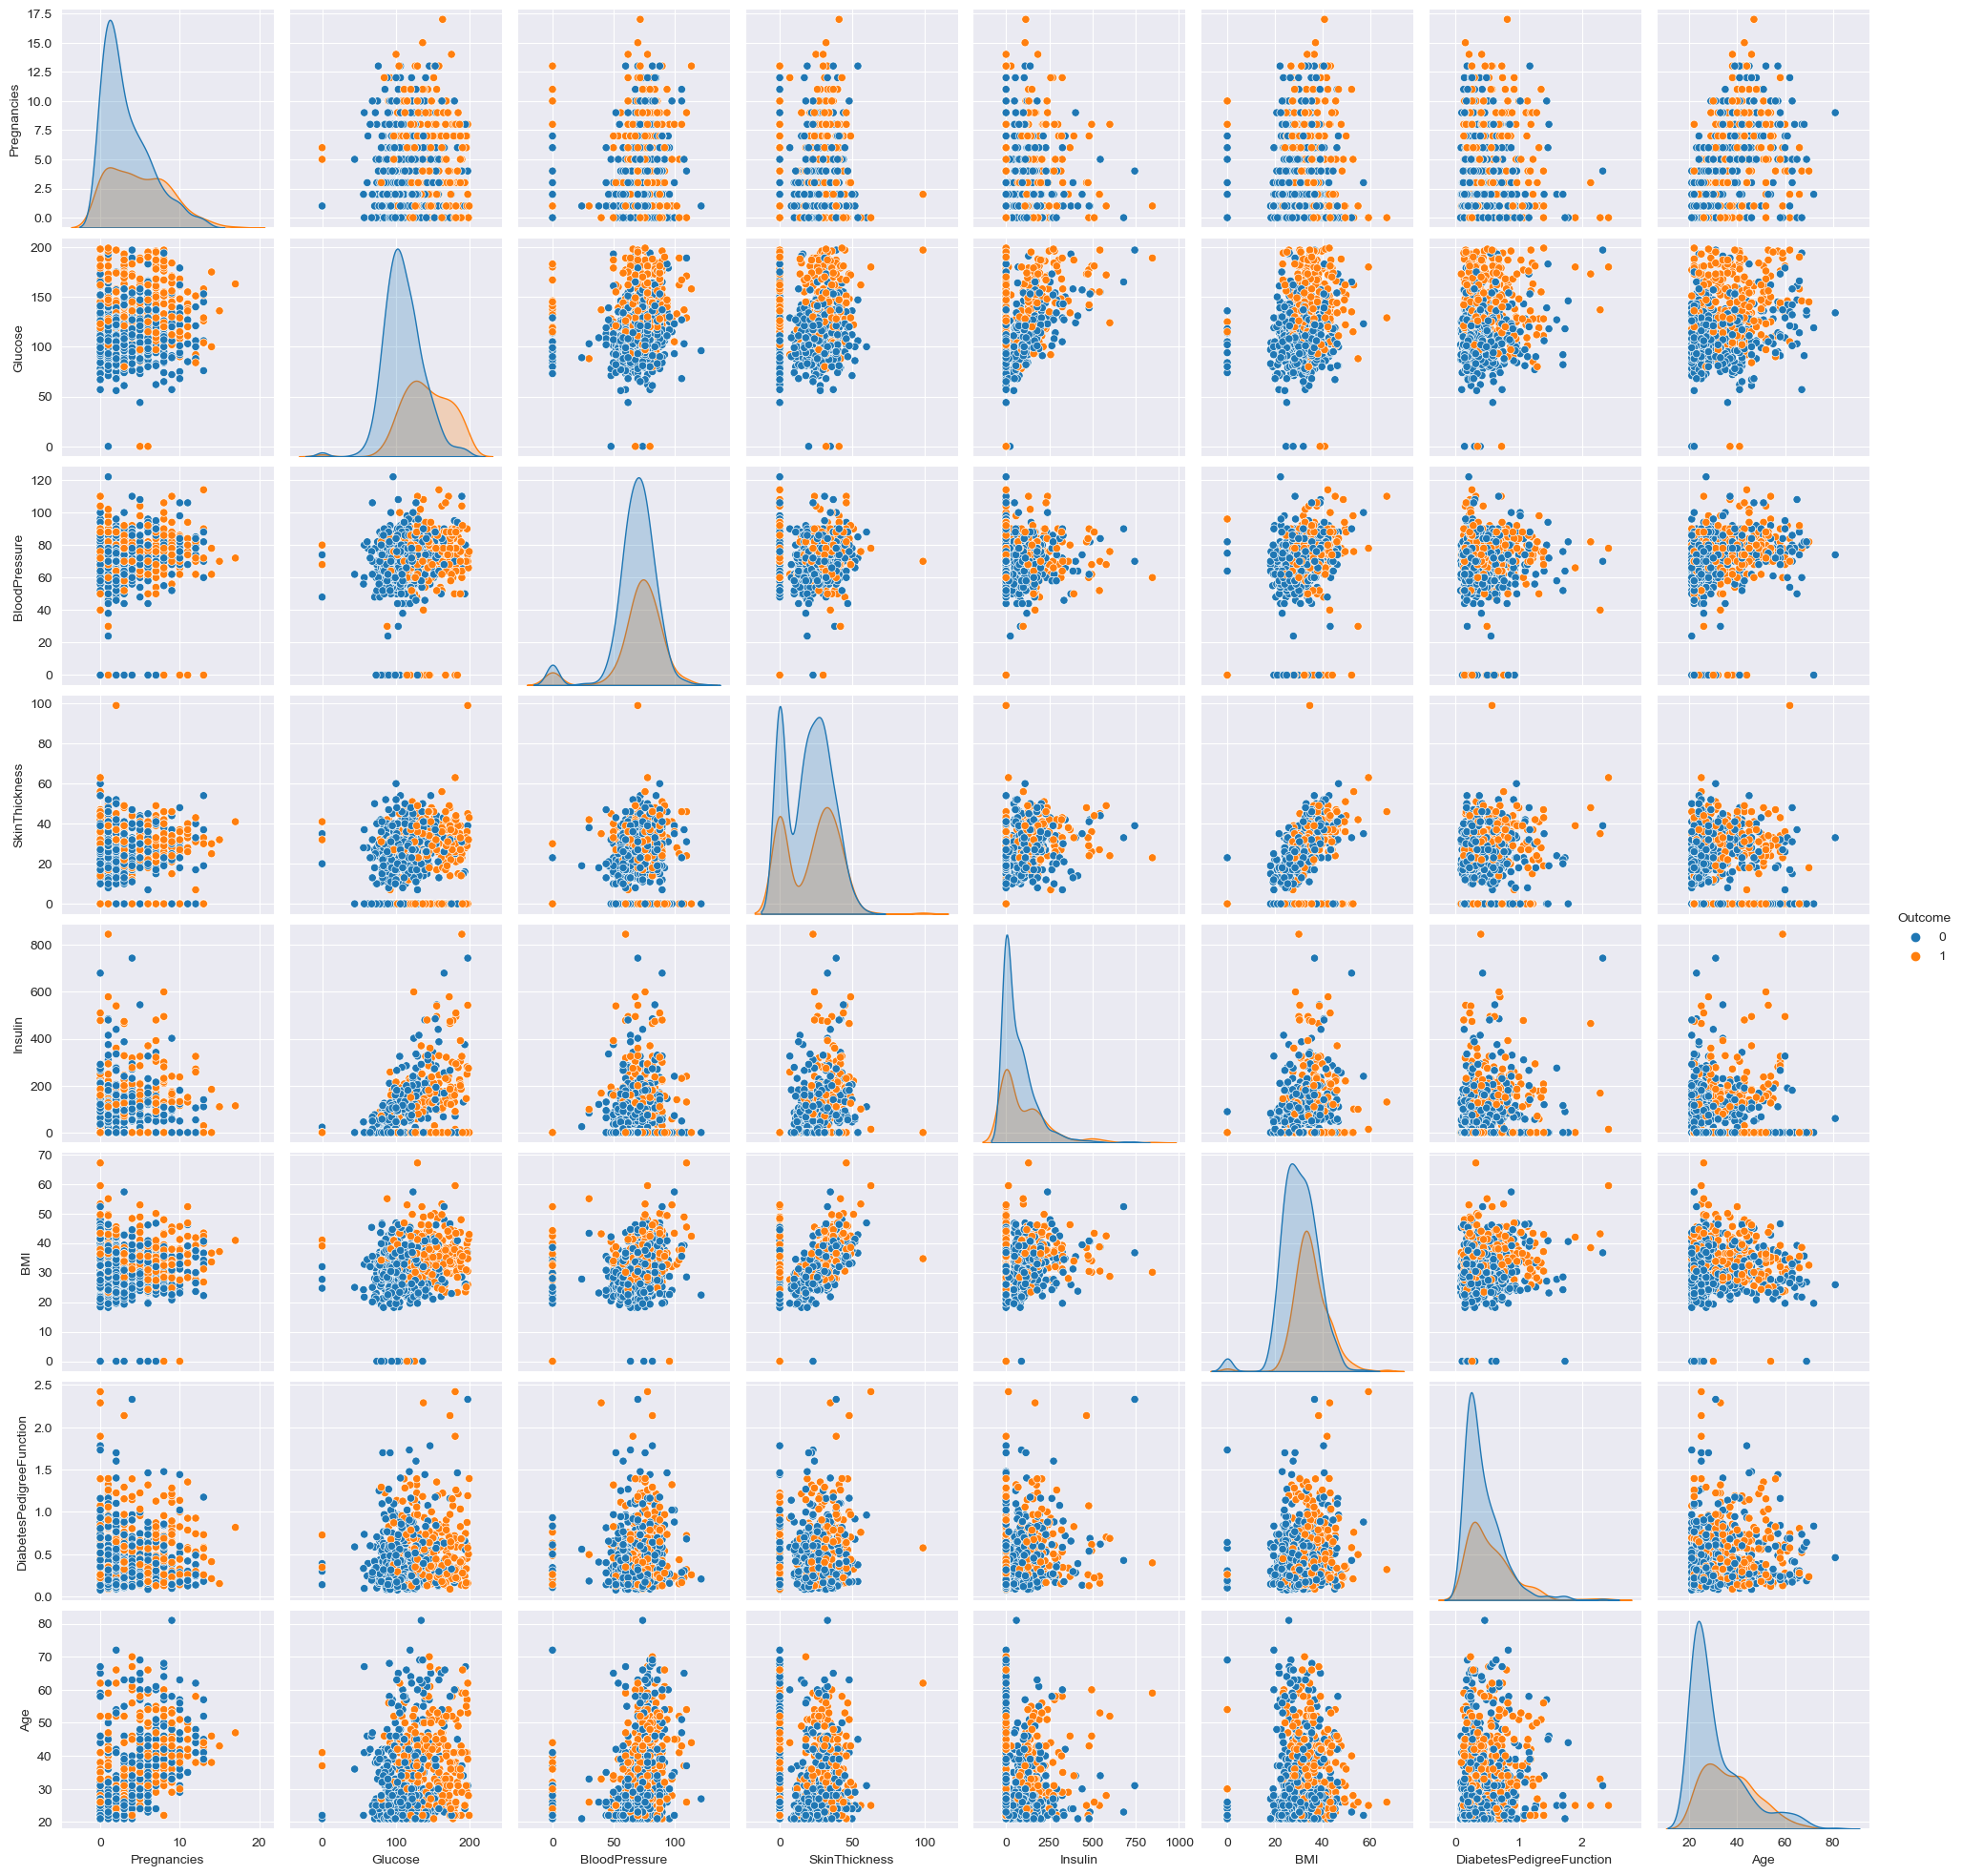

In [215]:
sns.pairplot(df, hue = 'Outcome')
plt.show()

### 7.3. Visualizing with the heatmap
The below heatmap shows the correlation between the columns. The darker the color, the more correlated the columns are. The lighter the color, the less correlated the columns are. The columns that are highly correlated are: The 1 in the diagonal of the heatmap shows that the column is highly correlated with itself. The columns that are less correlated are: The 0 in the diagonal of the heatmap shows that the column is less correlated with itself.

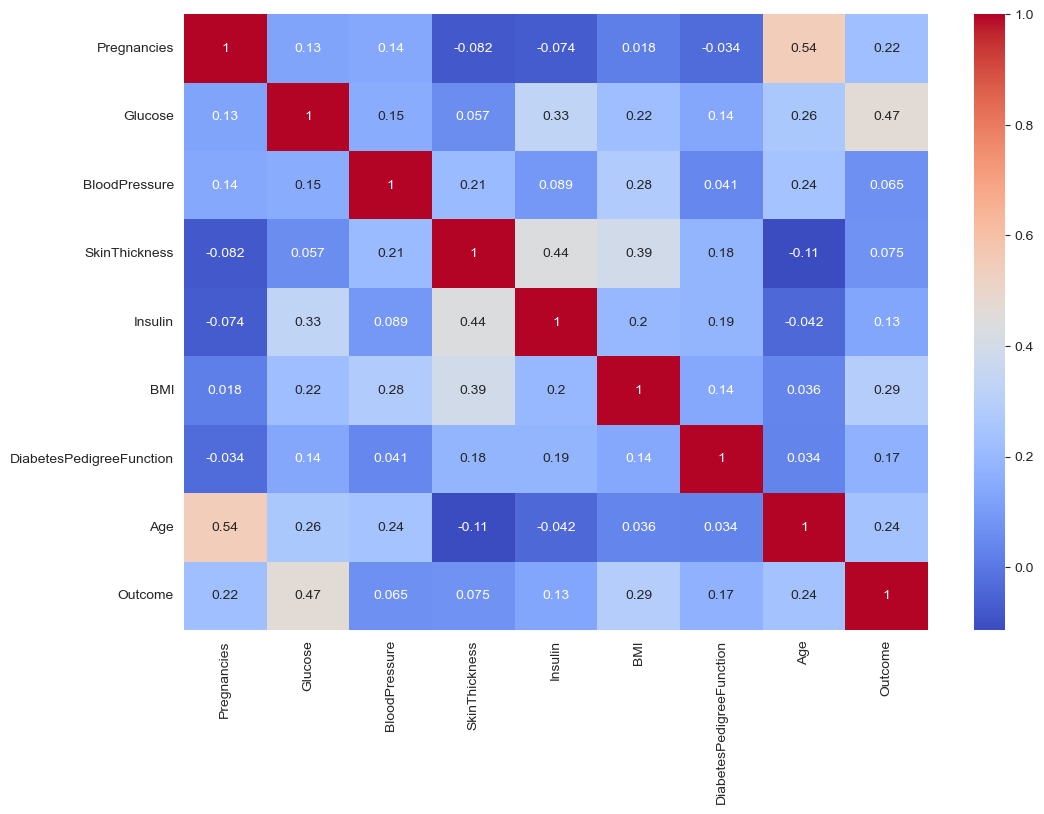

In [216]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

### 7.4. Visualizing with the boxplot
From the below boxplot, we can see that there are outliers in the Insulin column. We are going to remove the outliers from the Insulin column.

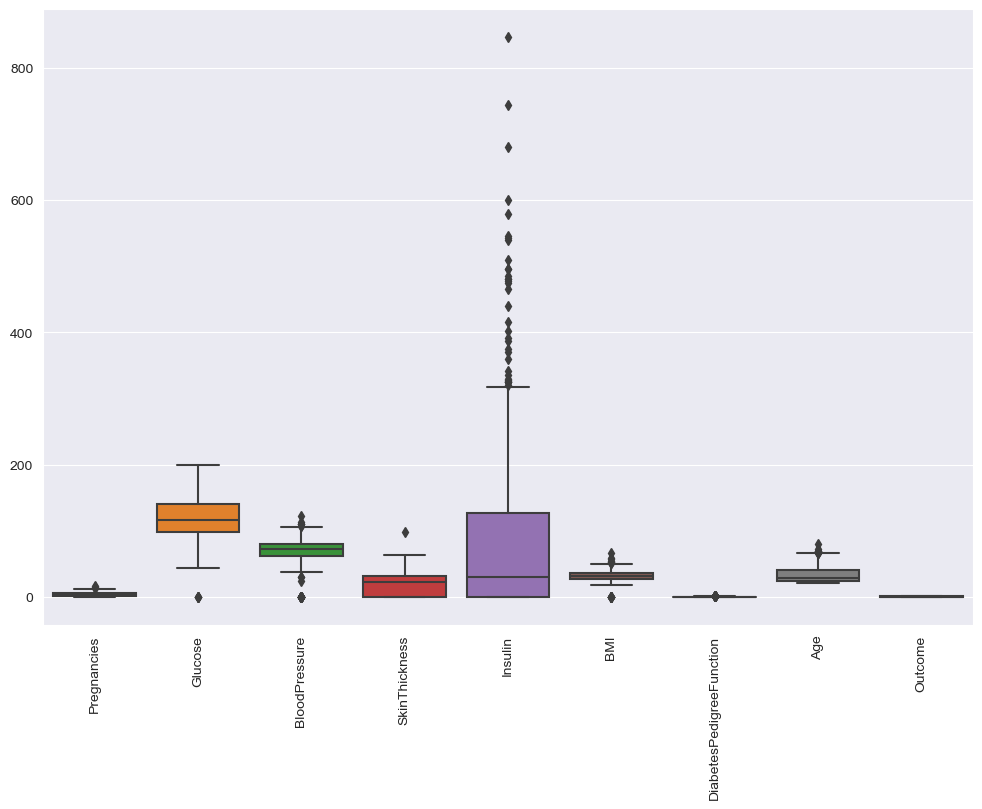

In [217]:
# box plot
plt.figure(figsize = (12, 8))
sns.boxplot(data = df)
plt.xticks(rotation = 90)
plt.show()

## 8. Data Preprocessing
From the above boxplot, we can see that there are outliers in the Insulin column. We are going to remove the outliers from the Insulin column.

In [218]:
# removing outliers from insulin column since it has the most outliers
Q1 = df['Insulin'].quantile(0.25)   # first quartile
Q3 = df['Insulin'].quantile(0.75)   # third quartile
IQR = Q3 - Q1   # interquartile range
df = df[(df['Insulin'] >= Q1 - 1.5 * IQR) & (df['Insulin'] <= Q3 + 1.5 * IQR)]  # removing outliers


## 9. Logistic Regression

### 9.1. Defining the sigmoid function, cost function, gradient descent function, and predict function
Sigmoid functin, cost function, and gradient descent function are most important functions while performing logistic regression.
- Sigmoid function: It is used to convert the output of the linear regression function to a value between 0 and 1. It is also called the activation function.
- Cost function: It is used to calculate the error between the predicted value and the actual value.
- Gradient descent function: It is used to update the weights.
- Predict function: It is used to predict the output.

In [219]:
# gradient_descent using sigmoid function numpy
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(yp, y):
    return (-y * np.log(yp) - (1 - y) * np.log(1 - yp)).mean()

def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        z = np.dot(X, B)
        yp = sigmoid(z)
        loss = yp - Y
        dw = np.dot(X.T, loss) / m
        B = B - alpha * dw
        z = np.dot(X, B)
        yp = sigmoid(z)
        cost = cost_function(yp, Y)
        # print("Iteration: ", iteration, " Cost: ", cost)
        cost_history[iteration] = cost
    return B, cost_history

def predict(x, w):
    z = np.dot(x, w)
    y_pred = sigmoid(z)
    return (y_pred > 0.5).astype(int)

### 9.2. Standardizing the dataset
Before performing logistic regression, we need to standardize the dataset. Standardization is a method of transforming data so that its distribution will have a mean near to 0 and a standard deviation of 1.

In [220]:
# Standardizing the dataset
def standardize(df):
    for column in df.columns:
        df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df

df = standardize(df)
# mean and std of standardized data
df.mean(), df.std()

(Pregnancies                -1.500465e-16
 Glucose                     4.235183e-17
 BloodPressure              -9.368452e-18
 SkinThickness              -1.966335e-18
 Insulin                    -4.265435e-17
 BMI                         3.628266e-15
 DiabetesPedigreeFunction    1.598328e-15
 Age                         1.418786e-16
 Outcome                     3.124960e-16
 dtype: float64,
 Pregnancies                 1.0
 Glucose                     1.0
 BloodPressure               1.0
 SkinThickness               1.0
 Insulin                     1.0
 BMI                         1.0
 DiabetesPedigreeFunction    1.0
 Age                         1.0
 Outcome                     1.0
 dtype: float64)

### 9.3. Splitting the dataset into the Training set and Test set
Splitting the dependent and independent variables. Here in this code, Outcome is the dependent variable and the rest of the columns are the independent variables.

In [221]:
x = df.drop('Outcome', axis=1).to_numpy()   # independent variables
y = df['Outcome'].to_numpy()    # dependent variable

In [222]:
x0 = np.ones((x.shape[0], 1))       # adding x0 column
x = np.concatenate((x0, x), axis=1)     # adding x0 column to x, to make the shape of x (768, 9)

### 9.4. Splitting the dataset into the Training set and Test set
The data is split down to train and test where 80% of the data is used for training and 20% of the data is used for testing.

In [223]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12, shuffle=True) # splitting the data into train and test

In [224]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape    # shape of the data

((587, 9), (147, 9), (587,), (147,))

### 9.5. Weight initialization
The weights are initialized to 0 with the same shape as the number of features.

In [225]:
# initializing weights
w = np.zeros(x_train.shape[1])

### 9.6. Training the model
The model is trained using the gradient descent function. The learning rate is set to 0.001 and the number of iterations is set to 1000.

In [226]:
# trainning the model
w, cost_history = gradient_descent(x_train, y_train, w, 0.001, 1000)

### 9.7. Predicting the Test set results
Here we are predicting the test set results.

In [227]:
# predicting the test set results
y_pred = predict(x_test, w)

### 9.8. Evaluating the model

#### 9.8.1. Classification accuracy
The classification accuracy is the ratio of the number of correct predictions to the total number of input samples. The classification accuracy of this model is 0.8299, which means that the model is 82.99% accurate.

In [228]:
y_test_binary = [1 if y >= 0.5 else 0 for y in y_test]
y_pred_binary = [1 if y >= 0.5 else 0 for y in y_pred]
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy: ", accuracy)

Accuracy:  0.8299319727891157


#### 9.8.2. F1 score
The F1 score is the harmonic mean of precision and recall. The F1 score of this model is 0.71, which means that the model is 71% accurate.

In [229]:
f1 = f1_score(y_test_binary, y_pred_binary)
print("F1 Score: ", f1)

F1 Score:  0.7191011235955056


#### 9.8.3. Confusion matrix
The confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. The confusion matrix of this model is [[90, 6], [19, 32]], which means that the model has 90 true positives, 32 true negatives, 6 false positives, and 19 false negatives.

In [230]:
cm = confusion_matrix(y_test_binary, y_pred_binary)
print(cm)


[[90  6]
 [19 32]]


### 9.9. Visualizing model performance

#### 9.9.1. Cost history
The cost history is a plot of the cost function over the number of iterations. The below plot shows that the cost function decreases as the number of iterations increases, which means that the model is learning.

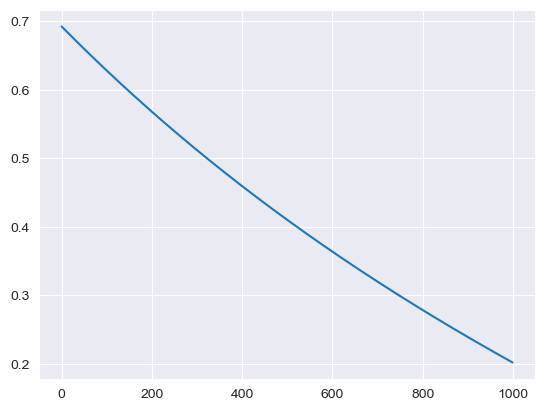

In [231]:
plt.plot(cost_history)
plt.show()

#### 9.9.2. ROC curve and AUC score
The ROC curve is a plot of the true positive rate against the false positive rate. The AUC score is the area under the ROC curve. The AUC score of this model is 0.81, which means that the model is 81% accurate.
Here the AUC score is 0.78, which means that the model is 78% accurate.

AUC:  0.7824754901960784


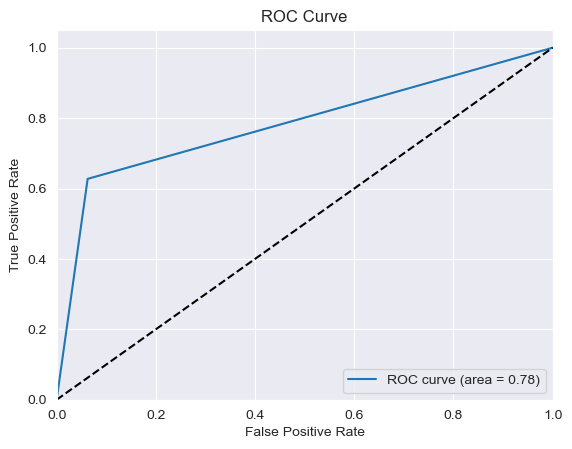

In [232]:
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
auc = roc_auc_score(y_test_binary, y_pred_binary)
print("AUC: ", auc)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# 10. Principal Component Analysis (PCA)

## 10.1. Importing the dataset
The dataset is being re-imported so that all the previous modifications will not affect the PCA.

In [233]:
df = pd.read_csv('diabetes.csv')

## 10.2. Standardizing the data
The data is standardized so that the mean of the data is close to  0 and the standard deviation is 1.

In [234]:
def standardize(df):
    for column in df.columns:
        df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df

df = standardize(df)    # standardizing the data

## 10.3. Initializing the dependent variable
The dependent variable is being initialized to the Outcome column, since the Outcome column is the target variable.

In [235]:
y = df['Outcome'].to_numpy()    # initializing the dependent variable

## 10.4. Applying PCA to the dataset
The dataset is being reduced to 2 principal components.

In [236]:
pca = PCA(n_components=2)   # applying PCA to the dataset
pca = pca.fit_transform(df) # fitting the dataset to the PCA

## 10.5. Initializing the independent variables
The independent variables are being initialized to the first two principal components.

In [237]:
X_pca = pca[:, 0]   # initializing the independent variables
X_pca = np.c_[np.ones(X_pca.shape[0]), X_pca]   # adding the bias term to the independent variables, so that the shape of the independent variables is (768, 2)

## 10.6. Splitting the dataset into the Training set and Test set
The dataset is being split into the training set and test set, where 80% of the data is used for training and 20% of the data is used for testing.

In [238]:
# splitting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=12, shuffle=True)

## 10.7. Initializing the weights, learning rate, and number of iterations
The weights are being initialized to 0, the learning rate is being initialized to 0.001, and the number of iterations is being initialized to 1000.

In [239]:
w = np.zeros(x_train.shape[1])  # initializing the weights
alpha = 0.001   # initializing the learning rate
iterations = 1000   # initializing the number of iterations

## 10.8. Training the model
The model is being trained using the training set and the weights are being updated using the gradient descent algorithm.

In [240]:
# training the model
w, cost_history = gradient_descent(x_train, y_train, w, alpha, iterations)

## 10.9. Predicting the test set results
The test set is being predicted using the weights that were updated during the training process.

In [241]:
# predicting the test set
y_pred = predict(x_test, w)

## 10.10. Evaluating the model

### 10.10.1. Classification accuracy
The classification accuracy of the model is 0.82, which means that the model is 82% accurate.

In [242]:
y_test_binary = [1 if y >= 0.5 else 0 for y in y_test]
y_pred_binary = [1 if y >= 0.5 else 0 for y in y_pred]
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy: ", accuracy)

Accuracy:  0.8246753246753247


### 10.10.2. F1 score
The F1 score of the model is 0.74, which means that the model is 74% accurate.

In [243]:
f1 = f1_score(y_test_binary, y_pred_binary)
print("F1 Score: ", f1)

F1 Score:  0.7428571428571428


### 10.10.3. Confusion matrix
The confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. The confusion matrix of this model is [[88, 11], [16, 39]], which means that the model predicted 88 true negatives, 11 false positives, 16 false negatives, and 39 true positives.

In [244]:
cm = confusion_matrix(y_test_binary, y_pred_binary)
print(cm)

[[88 11]
 [16 39]]


### 10.11. Visulizing the results

#### 10.11.1. Cost history
The cost history is a plot of the cost function against the number of iterations. From the below plot, it can be seen that the cost function decreases as the number of iterations increases which means that the model is improving as the number of iterations increases.

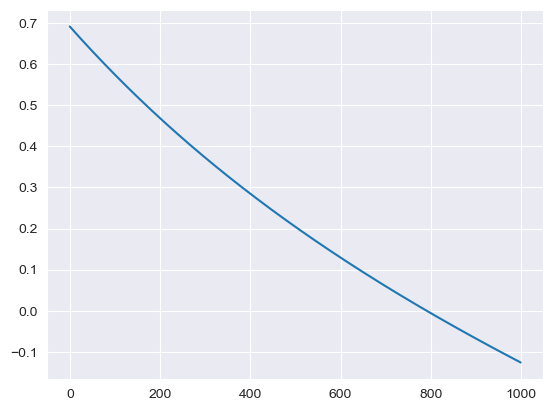

In [245]:
plt.plot(cost_history)
plt.show()

#### 10.11.2. ROC curve and AUC score
The ROC curve is a plot of the true positive rate against the false positive rate. The AUC score is the area under the ROC curve. The AUC score of this model is 0.79, which means that the model is 79% accurate.

AUC:  0.7989898989898989


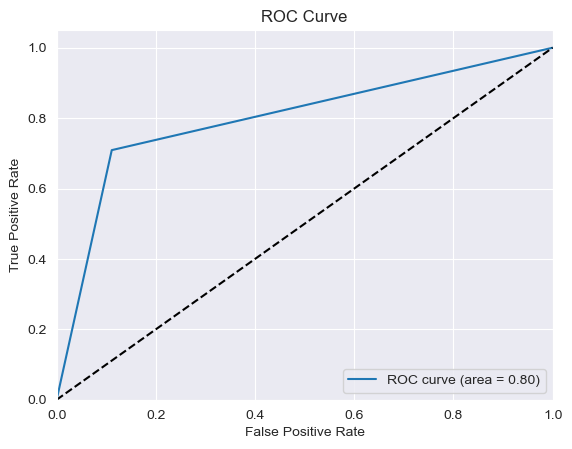

In [246]:
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
auc = roc_auc_score(y_test_binary, y_pred_binary)
print("AUC: ", auc)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# 11. Conclusion

## 11.1. Before PCA
The classification accuracy of the model is 0.77, which means that the model is 77% accurate. The F1 score of the model is 0.67, which means that the model is 67% accurate. The AUC score of the model is 0.73, which means that the model is 73% accurate.
Learning outcome:
1. I have learned the overall workflow of logistic regression, how it works and what is happening.
2. I have learned the what is the difference between linear regression and logistic regression.
3. I have learned the sigmoid function and how it is used in logistic regression.
4. I have learned how to optimize the cost using gradient descent.
5. I have learned to visualize all the datas and how to interpret them.

## 11.2. After PCA
The classification accuracy of the model is 0.82, which means that the model is 82% accurate. The F1 score of the model is 0.74, which means that the model is 74% accurate. The AUC score of the model is 0.79, which means that the model is 79% accurate.
Learning outcome:
1. I have learned how to apply PCA to the dataset.
2. I have learned the difference between the dataset before and after applying PCA.
3. I have learned that the data affects the accuracy of the model, not the process.